In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [17]:
df = pd.read_excel('Providers.xlsx').drop(columns=['№'])
df.head()

,Наименование,Регистрационный номер,Наименование полное,Адрес (место нахождения),Руководитель - ФИО,Телефон,Электронный адрес,Дата регистрации,"Возраст компании, лет",Вид деятельности/отрасль,...,"2022, Коэффициент оборачиваемости совокупных активов, %","2022, Валовая рентабельность, %","2022, Рентабельность продаж, %","2022, Доля себестоимости как процент от выручки, %","2022, Рентабельность активов (ROA), %","2022, Рентабельность капитала (ROE), %","2022, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %","2022, Коэффициент текущей ликвидности, %","2022, Коэффициент быстрой ликвидности, %","2022, Коэффициент абсолютной ликвидности, %"
0,"1-АЯ ВАТЕР КОМПАНИ, ООО",1142651006398,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""1-АЯ...","357202, Ставропольский край, г.о. Минераловодс...",Коптиевский Вадим Валерьевич,+7 (879) 3259919,NaN,2014-03-18,9.0,"Торговля оптовая соками, минеральной водой и п...",...,6.2,NaN,0.1,0.9,0.2,0.5,NaN,1.6,1.0,NaN
1,"108 ЧК, ООО",1080276000298,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""108 ЧК""","450071, Башкортостан респ., г. Уфа, ул. Мендел...",Мухамадиева Динара Фандусовна,+7 (347) 2374074,NaN,2008-01-31,15.0,"Торговля оптовая кофе, чаем, какао и пряностями",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"13 УСТРИЦ, ООО",1197746593835,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""13 У...","107553, г. Москва, вн.тер.г. муниципальный окр...",Буторина Екатерина Владимировна,NaN,NaN,2019-10-03,3.5,"Торговля оптовая рыбой, ракообразными и моллюс...",...,1.9,NaN,0.0,1.0,0.0,0.4,NaN,1.2,0.9,0.1
3,"16-Я РЕСПУБЛИКА, ООО",1167847127953,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""16-Я...","197136, г. Санкт-Петербург, вн.тер.г. муниципа...",Жилина Галина Ивановна,+7 (495) 0035916\n+7 (800) 1001681,NaN,2016-03-11,7.0,Торговля оптовая неспециализированная пищевыми...,...,0.8,NaN,0.2,0.8,NaN,NaN,NaN,4.3,0.5,0.2
4,"21 ВЕК, ООО",1121103001018,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""21 ВЕК""","169912, Коми респ., г. Воркута, набережная Шах...",Закирова Наталья Николаевна,+7 (82151) 55207,emir77@list.ru,2012-05-23,11.0,Торговля оптовая пивом,...,33.1,0.1,0.1,0.9,1.9,6.3,9.5,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                                                                                      Non-Null Count  Dtype         
---  ------                                                                                      --------------  -----         
 0   Наименование                                                                                10000 non-null  object        
 1   Регистрационный номер                                                                       10000 non-null  int64         
 2   Наименование полное                                                                         10000 non-null  object        
 3   Адрес (место нахождения)                                                                    10000 non-null  object        
 4   Руководитель - ФИО                                                                          9998 non-null   object     

In [19]:
df.nunique()

Наименование                                                                                   8471
Регистрационный номер                                                                         10000
Наименование полное                                                                            8557
Адрес (место нахождения)                                                                       9746
Руководитель - ФИО                                                                             9535
Телефон                                                                                        7706
Электронный адрес                                                                              3537
Дата регистрации                                                                               4664
Возраст компании, лет                                                                            67
Вид деятельности/отрасль                                                                         47


In [20]:
df.isna().sum().sort_values(ascending=True)

Наименование                                                                                     0
Дата регистрации                                                                                 0
Адрес (место нахождения)                                                                         0
Возраст компании, лет                                                                            0
Регистрационный номер                                                                            0
Наименование полное                                                                              0
Руководитель - ФИО                                                                               2
Вид деятельности/отрасль                                                                         2
Уставный капитал, RUB                                                                           45
Сводный индикатор                                                                              106
Телефон   

In [21]:
df = df.drop([
#     'Телефон', 
         '2022, Среднесписочная численность работников', 
         'Размер компании', 
         '2022, Коэффициент текущей ликвидности, %', 
         '2022, Коэффициент быстрой ликвидности, %', 
         '2022, Рентабельность капитала (ROE), %', 
         '2022, Рентабельность активов (ROA), %', 
         '2022, Коэффициент абсолютной ликвидности, %', 
         '2022, Себестоимость продаж, RUB', 
         '2022, Коэффициент оборачиваемости совокупных активов, %', 
         '2022, Период оборота активов, дни', 
         '2022, Рентабельность продаж, %', 
         '2022, Доля себестоимости как процент от выручки, %', 
         '2022, Запасы, RUB', 
         '2022, Уставный капитал , RUB', 
         '2022, Оборачиваемость основных средств, разы', 
         '2022, Период оборота основных средств, дни', 
         '2022, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %', 
         '2022, Соотношение валовой прибыли к активам компании, %', 
         '2022, Валовая рентабельность, %', 'Электронный адрес', 
#          'Предмет поставки', 
#          'Важная информация', 
         '2022, Поступления от текущих операций, RUB', 
         '2022, Платежи поставщикам и подрядчикам, RUB', 
         '2022, Поступления от продаж, RUB', 
         '2022, Поступления от инвестиционных операций, RUB', 
         '2022, Получение дивидендов, процентов, RUB', 
         '2022, Поступления арендных, лицензионных, комиссионных платежей, роялти, RUB', 
         '2022, Поступления от перепродажи финансовых вложений, RUB', 
         '2022, Поступления от выпуска акций, увеличения долей участия, RUB', 
         '2022, Поступления от выпуска облигаций, векселей и других долговых ценных бумаг и др., RUB'], axis=1)

a = ['Сводный индикатор', 'Уставный капитал, RUB', 'Вид деятельности/отрасль', 'Руководитель - ФИО']
for col in a:
    df = df[df[col].notna()]


In [22]:
df.isna().sum().sort_values(ascending=True)

Наименование                   0
Регистрационный номер          0
Наименование полное            0
Адрес (место нахождения)       0
Руководитель - ФИО             0
Дата регистрации               0
Возраст компании, лет          0
Вид деятельности/отрасль       0
Сводный индикатор              0
Уставный капитал, RUB          0
Телефон                     2193
Предмет поставки            7604
Важная информация           7749
dtype: int64

In [23]:
pd.options.display.float_format = '{:.1f}'.format
df.describe()

,Регистрационный номер,"Возраст компании, лет","Уставный капитал, RUB"
count,9891.0,9891.0,9891.0
mean,1224438068593.1,11.3,5156675.4
std,626619862853.4,6.6,86505039.8
min,1020100695493.0,0.0,10.0
25%,1084632010401.5,6.5,10000.0
50%,1140280064132.0,9.5,10000.0
75%,1167847157702.5,15.0,100000.0
max,5187746031017.0,35.5,5132980000.0


In [24]:
df['Сводный индикатор']

0        Низкий риск
1       Средний риск
2        Низкий риск
3       Высокий риск
4        Низкий риск
            ...     
9994     Низкий риск
9995    Высокий риск
9996    Высокий риск
9997     Низкий риск
9998     Низкий риск
Name: Сводный индикатор, Length: 9891, dtype: object

In [25]:
industries = df['Вид деятельности/отрасль'].tolist()
suppliers = df['Наименование'].tolist()
reg_num = df['Регистрационный номер'].tolist()

In [26]:
import random
from random import shuffle

np.set_printoptions(precision=1, floatmode='fixed')
matrix =[0]*25

for i in range(25):
    random_number = np.random.randint(1, 25):
    r = np.random.default_rng().choice(np.arange(0, 5.1, 0.1).tolist(), random_number).tolist()+['empty']*(len(suppliers)-random_number)
    random.shuffle(r)
    matrix[i] = r

SyntaxError: invalid syntax (1642853895.py, line 8)

In [ ]:
ratings = pd.DataFrame(matrix, columns=df.index.tolist()).replace('empty', np.nan)
ratings.head()

In [ ]:
# ratings.info(verbose=True, show_counts=True)

In [ ]:
ratings.head()

In [ ]:
ratings = pd.melt(ratings, id_vars='User_id', value_vars=ratings.columns[1:]).sort_values(by='User_id').dropna()
ratings.columns = ratings.columns.str.replace('value', 'rating')
ratings.columns = ratings.columns.str.replace('variable', 'Registration number')
ratings.head()

In [ ]:
ratings.to_csv('ratings.csv')

In [27]:
providers = df[['Регистрационный номер', 'Наименование', 'Вид деятельности/отрасль', 'Телефон', 
                'Предмет поставки', 'Важная информация', 'Сводный индикатор', 'Уставный капитал, RUB',
                'Вид деятельности/отрасль', 'Руководитель - ФИО']].rename_axis('Registration number').reset_index()
providers.head()

,Registration number,Регистрационный номер,Наименование,Вид деятельности/отрасль,Телефон,Предмет поставки,Важная информация,Сводный индикатор,"Уставный капитал, RUB",Вид деятельности/отрасль,Руководитель - ФИО
0,0,1142651006398,"1-АЯ ВАТЕР КОМПАНИ, ООО","Торговля оптовая соками, минеральной водой и п...",+7 (879) 3259919,NaN,NaN,Низкий риск,100000.0,"Торговля оптовая соками, минеральной водой и п...",Коптиевский Вадим Валерьевич
1,1,1080276000298,"108 ЧК, ООО","Торговля оптовая кофе, чаем, какао и пряностями",+7 (347) 2374074,NaN,На 24.05.2023 22:06 имеются действующие решени...,Средний риск,10000.0,"Торговля оптовая кофе, чаем, какао и пряностями",Мухамадиева Динара Фандусовна
2,2,1197746593835,"13 УСТРИЦ, ООО","Торговля оптовая рыбой, ракообразными и моллюс...",NaN,NaN,NaN,Низкий риск,25000.0,"Торговля оптовая рыбой, ракообразными и моллюс...",Буторина Екатерина Владимировна
3,3,1167847127953,"16-Я РЕСПУБЛИКА, ООО",Торговля оптовая неспециализированная пищевыми...,+7 (495) 0035916\n+7 (800) 1001681,NaN,NaN,Высокий риск,10000.0,Торговля оптовая неспециализированная пищевыми...,Жилина Галина Ивановна
4,4,1121103001018,"21 ВЕК, ООО",Торговля оптовая пивом,+7 (82151) 55207,NaN,NaN,Низкий риск,10000.0,Торговля оптовая пивом,Закирова Наталья Николаевна


In [28]:
providers.to_csv('providers.csv')

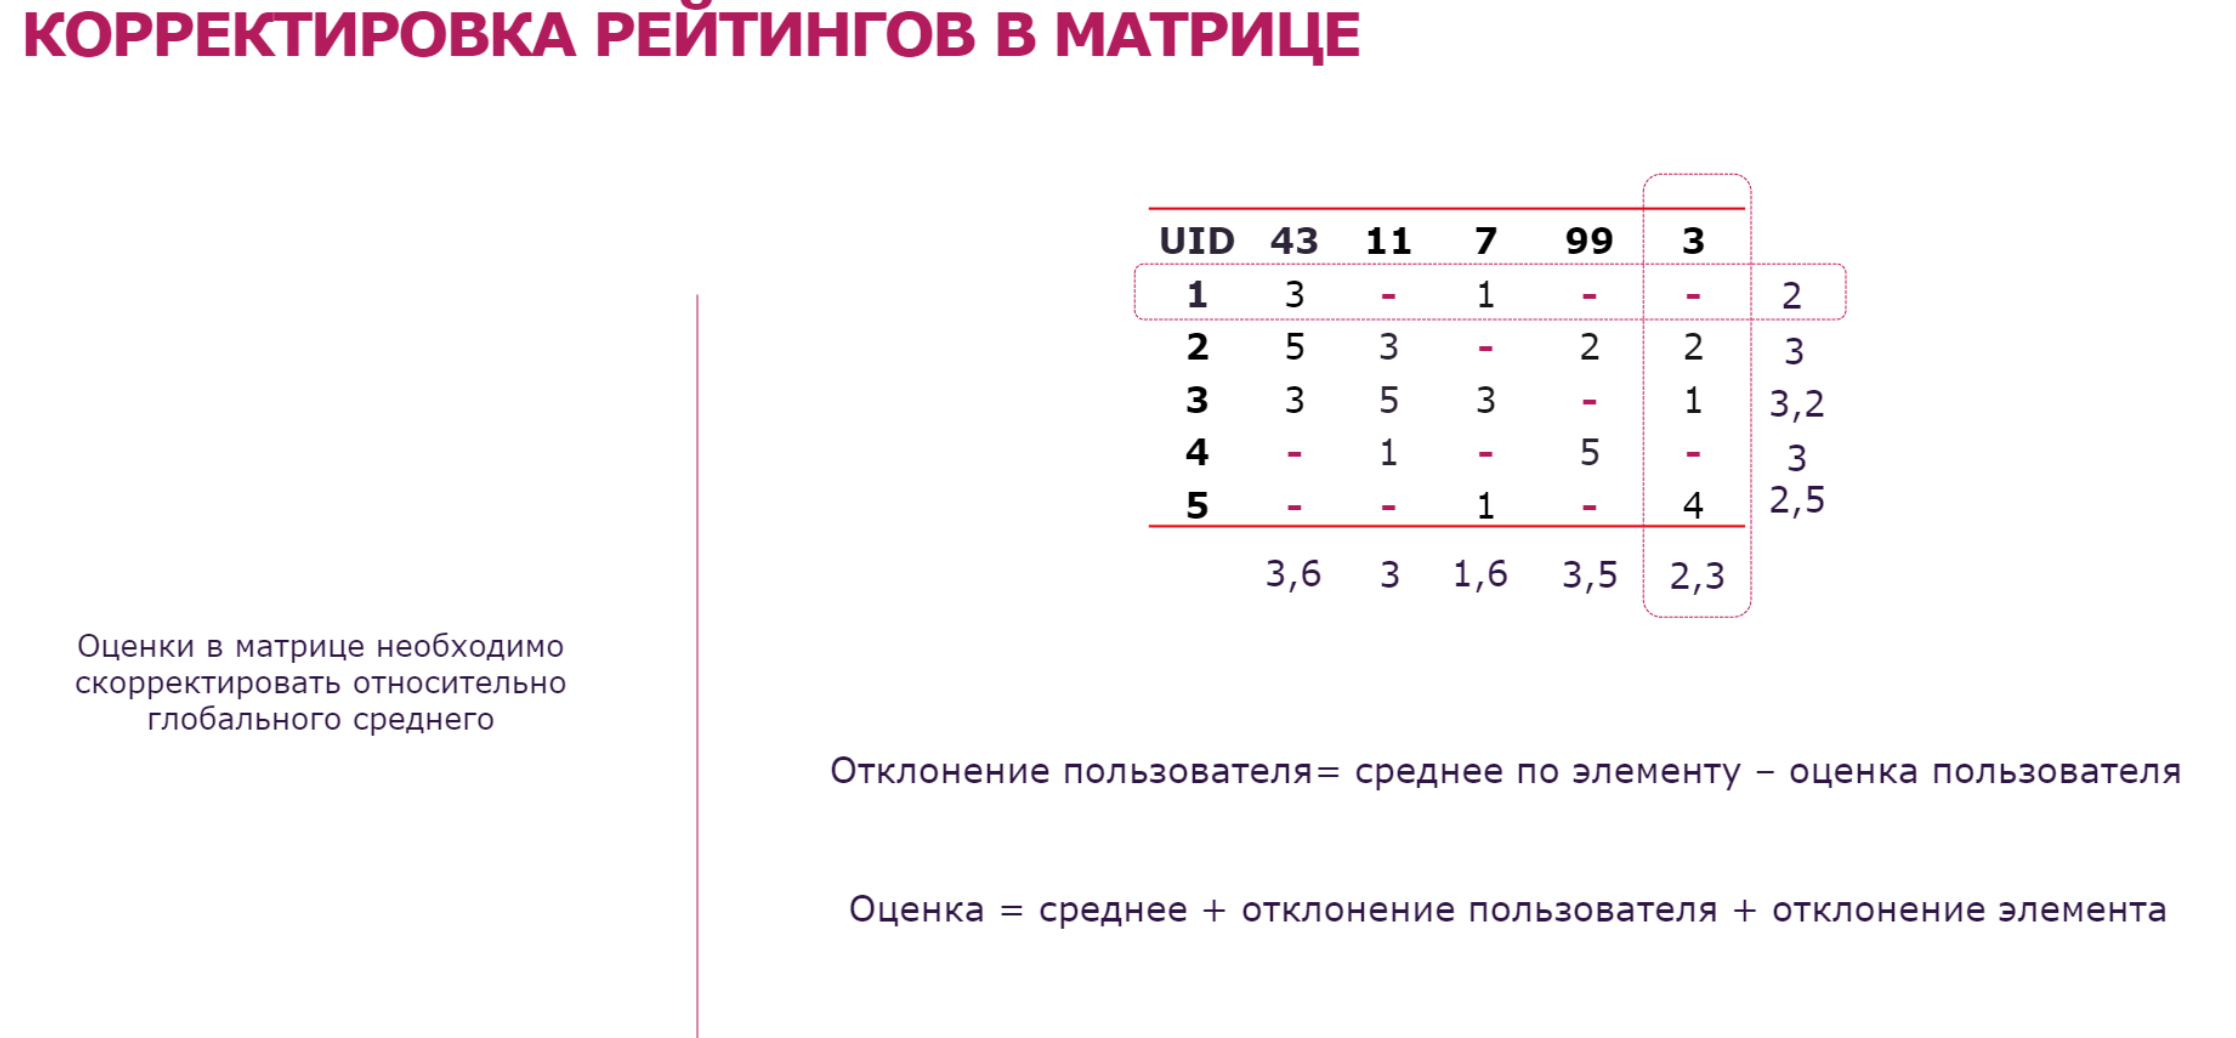

